#                                      Material Informatics(MTN-316)

##                                                              Tutorial - 1(G-4)




###  Name : Subhadip Mandal , Harsh Raj Bharti , Sorra Sai Teja
###  Enrollment No : 20118091 , 20118034 , 20118089


In [46]:
MY_API = "joqsp2fB8lGkkSOQQDK"

### Q1. 
Using get_materials_ids and get_structure to obtain the MPIDs for perovskite material CH3NH3PbI3 .  Use one of the MPID to obtain the structural parameters.

In [47]:
from pymatgen.ext.matproj import MPRester 
mpr = MPRester(MY_API)
ans = mpr.get_materials_ids("CH3NH3PbI3")
ans

C:\Users\DELL\miniconda3\envs\my_pymatgen\lib\site-packages\pymatgen\ext\matproj.py:179: UserWarning:

You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.



['mp-995203', 'mp-995214', 'mp-995227', 'mp-977013', 'mp-990432', 'mp-1194604']

In [48]:
structure = mpr.get_structure_by_material_id("mp-995203")
print(structure)

Full Formula (H24 Pb4 C4 I12 N4)
Reduced Formula: H6PbCI3N
abc   :   8.919519   9.012627  12.740755
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (48)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  H     0.388408  0.410677  0.320741         0
  1  H     0.611592  0.589323  0.679259         0
  2  H     0.888408  0.089323  0.679259         0
  3  H     0.111592  0.910677  0.320741         0
  4  H     0.611592  0.589323  0.820741         0
  5  H     0.388408  0.410677  0.179259         0
  6  H     0.111592  0.910677  0.179259         0
  7  H     0.888408  0.089323  0.820741         0
  8  H     0.602561  0.577773  0.315093         0
  9  H     0.397439  0.422227  0.684907         0
 10  H     0.102561  0.922227  0.684907         0
 11  H     0.897439  0.077773  0.315093         0
 12  H     0.397439  0.422227  0.815093         0
 13  H     0.602561  0.577773  0.184907         0
 14  H 

### Q2.
Find the formula and Material ID for all the mono-oxides in the Materials Project database.

In [49]:
criteria = {'elements':{"$all": ["O"]},
           'nelements':2,
           "anonymous_formula": {"A" : 1 , "B" : 1},
           }

# entries = mpr.query("*O" , ["material_id" , "pretty_formula"])
# len(entries) , entries

props = [ "material_id" , "pretty_formula" ]

entries = mpr.query(criteria=criteria , properties = props)
len(entries),entries

(207,
 [{'material_id': 'mp-1244926', 'pretty_formula': 'TiO'},
  {'material_id': 'mp-2229', 'pretty_formula': 'ZnO'},
  {'material_id': 'mp-754197', 'pretty_formula': 'NdO'},
  {'material_id': 'mp-1181437', 'pretty_formula': 'FeO'},
  {'material_id': 'mp-1147768', 'pretty_formula': 'CuO'},
  {'material_id': 'mp-1287184', 'pretty_formula': 'VO'},
  {'material_id': 'mp-1245329', 'pretty_formula': 'SnO'},
  {'material_id': 'mp-31000', 'pretty_formula': 'NO'},
  {'material_id': 'mp-1178414', 'pretty_formula': 'CrO'},
  {'material_id': 'mp-1265', 'pretty_formula': 'MgO'},
  {'material_id': 'mp-2311', 'pretty_formula': 'NbO'},
  {'material_id': 'mp-19091', 'pretty_formula': 'CrO'},
  {'material_id': 'mp-1245304', 'pretty_formula': 'CoO'},
  {'material_id': 'mp-8222', 'pretty_formula': 'AgO'},
  {'material_id': 'mp-1283030', 'pretty_formula': 'FeO'},
  {'material_id': 'mp-1059242', 'pretty_formula': 'ClO'},
  {'material_id': 'mp-1245039', 'pretty_formula': 'MgO'},
  {'material_id': 'mp-67366

### Q3.
There are 78 entries of Al2O3 in the MP database . Use mpr.query to find out how many AlxOy compounds are there in the Materials Project ?

In [50]:
criteria = {"chemsys" : "Al-O"}

props = ["pretty_formula" ]

entries = mpr.query(criteria=criteria , properties = props)

print(len(entries) ,"AlxOy compounds are there in the Materials Project ")

101 AlxOy compounds are there in the Materials Project 


### Q4.
Use the MPRester’s get_bandstructure_by_material_id method to get a band structure of mp-165 from Materials Database and plot it using the plot_bandstructure function. Identify the formula for the same.

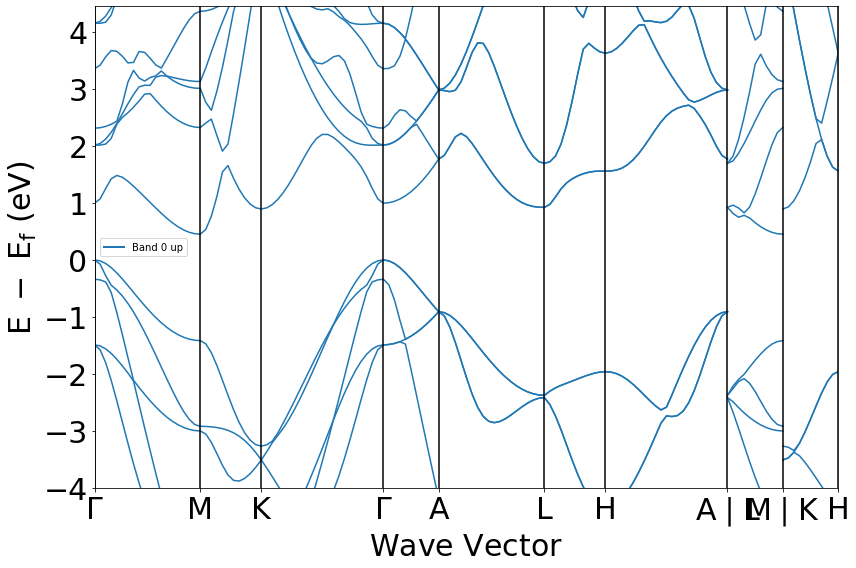

Formula for the band structure -  Si


In [51]:
bandStruct = mpr.get_bandstructure_by_material_id("mp-165")

from pymatgen.electronic_structure.plotter import BSPlotter
plt = BSPlotter(bandStruct)
#plt.get_plot()
plt.show()

formula = mpr.query({"material_id" : "mp-165"} , ["pretty_formula"])
for f in formula:
    print("Formula for the band structure - " , f["pretty_formula"])
    break

### Q5.
Do a mpr.query to find the MPID , crystal system and density of all LiFePO4 compounds. Also collect their crystal systems(orthorhombic , monoclinic , triclinic ….). Plot a bar graph with frequency on y-axis and type of crystal system on the x axis.

In [52]:
criteria = {'elements':{"$all": ["Li" , "Fe" , "P" , "O"]},
            'nelements':4,
            'anonymous_formula': {"A": 1, "B": 1, "C": 1 , "D" : 4},
           }

props = ["material_id" , "crystal_system" , "density" , "pretty_formula" ]

mpr.query(criteria=criteria , properties=props)


[{'material_id': 'mp-758222',
  'crystal_system': 'orthorhombic',
  'density': 3.306896826541691,
  'pretty_formula': 'LiFePO4'},
 {'material_id': 'mp-757019',
  'crystal_system': 'orthorhombic',
  'density': 3.357816141816954,
  'pretty_formula': 'LiFePO4'},
 {'material_id': 'mp-1661570',
  'crystal_system': 'orthorhombic',
  'density': 3.0712554473782143,
  'pretty_formula': 'LiFePO4'},
 {'material_id': 'mp-19017',
  'crystal_system': 'orthorhombic',
  'density': 3.470895937963407,
  'pretty_formula': 'LiFePO4'},
 {'material_id': 'mp-1176703',
  'crystal_system': 'monoclinic',
  'density': 3.2637341600617025,
  'pretty_formula': 'LiFePO4'},
 {'material_id': 'mp-757406',
  'crystal_system': 'orthorhombic',
  'density': 2.9081413812201813,
  'pretty_formula': 'LiFePO4'},
 {'material_id': 'mp-756958',
  'crystal_system': 'monoclinic',
  'density': 2.8379115879383354,
  'pretty_formula': 'LiFePO4'},
 {'material_id': 'mp-765605',
  'crystal_system': 'triclinic',
  'density': 2.96437036810

### Graph

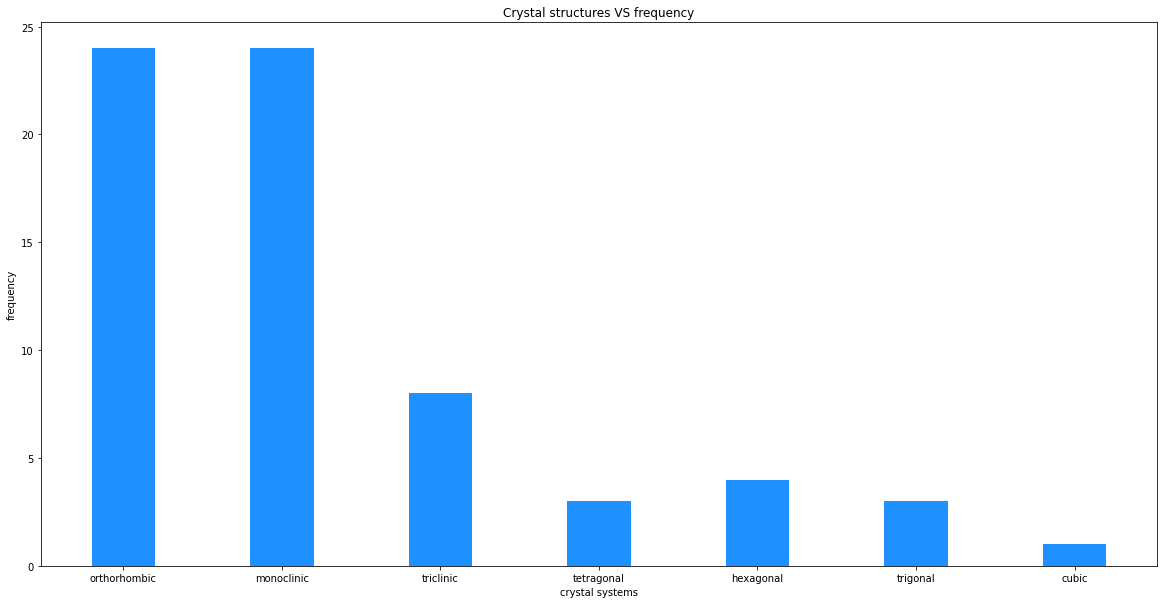

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
with MPRester(MY_API) as mpr:
    entries = mpr.query("LiFePO4" , ["material_id" , "spacegroup.crystal_system"])
    systems = (entry["spacegroup.crystal_system"] for entry in entries)   #lists of all crystal structures
    counts = {}
    
    for system in systems:
        
        if system in counts:
            counts[system] += 1

        else:
            counts[system] = 1



fig = plt.figure(figsize = (20 , 10))
plt.bar(counts.keys() , counts.values() , color="dodgerblue" , width=0.4)
plt.xlabel("crystal systems")
plt.ylabel("frequency")
plt.title("Crystal structures VS frequency")
plt.show()


### Q6.
Construct the convex hull of the Cu-O-H system and name the stable compounds.

In [54]:
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
import math

mpr = MPRester(MY_API)

entries = mpr.get_entries_in_chemsys(['Cu','O','H'])

pd = PhaseDiagram(entries)

plotter = PDPlotter(pd)
plotter.show()  

C:\Users\DELL\miniconda3\envs\my_pymatgen\lib\site-packages\pymatgen\ext\matproj.py:179: UserWarning:

You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.



### 7.	Create a Structure of strontium ferrite, mp-510624

In [55]:
structure = mpr.get_structure_by_material_id("mp-510624")
print(structure) 

Full Formula (Sr1 Fe1 O3)
Reduced Formula: SrFeO3
abc   :   3.913187   3.913187   3.913187
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Sr    0.5  0.5  0.5    -0.005
  1  Fe    0    0    0      -3.97
  2  O     0.5  0    0      -0.1
  3  O     0    0.5  0      -0.028
  4  O     0    0    0.5    -0.019


### a) 
Create a Structure of strontium ferrite, mp-510624. 

In [56]:
criteria = {'material_id': "mp-510624"}

props = ["pretty_formula" , "density" , "volume" ,"structure"]

data = mpr.query(criteria=criteria , properties=props)
print(data)

[{'pretty_formula': 'SrFeO3', 'density': 5.305698953453972, 'volume': 59.922759697716636, 'structure': Structure Summary
Lattice
    abc : 3.913187 3.913187 3.913187
 angles : 90.0 90.0 90.0
 volume : 59.922759697716636
      A : 3.913187 0.0 0.0
      B : 0.0 3.913187 0.0
      C : 0.0 0.0 3.913187
    pbc : True True True
PeriodicSite: Sr (1.9566, 1.9566, 1.9566) [0.5000, 0.5000, 0.5000]
PeriodicSite: Fe (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: O (1.9566, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: O (0.0000, 1.9566, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: O (0.0000, 0.0000, 1.9566) [0.0000, 0.0000, 0.5000]}]


### b)
Replace all of the Fe species with Co.

In [57]:
import pymatgen.core as mg
structure.replace_species({mg.Element("Fe") : mg.Element("Co")})
mid = mpr.get_material_id("SrCoO3")
ans = mpr.query({"material_id" : mid[0]} , ["density" , "volume"])

print(ans)
print(structure)


[{'density': 5.4879828648204, 'volume': 235.46734734172708}]
Full Formula (Sr1 Co1 O3)
Reduced Formula: SrCoO3
abc   :   3.913187   3.913187   3.913187
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Sr    0.5  0.5  0.5    -0.005
  1  Co    0    0    0      -3.97
  2  O     0.5  0    0      -0.1
  3  O     0    0.5  0      -0.028
  4  O     0    0    0.5    -0.019


### c)
Replace one of Co with an Fe after making supercell of [2,2,2]

In [58]:
structure.make_supercell(2)

In [59]:
print(structure)

Full Formula (Sr8 Co8 O24)
Reduced Formula: SrCoO3
abc   :   7.826374   7.826374   7.826374
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (40)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Sr    0.25  0.25  0.25    -0.005
  1  Sr    0.25  0.25  0.75    -0.005
  2  Sr    0.25  0.75  0.25    -0.005
  3  Sr    0.25  0.75  0.75    -0.005
  4  Sr    0.75  0.25  0.25    -0.005
  5  Sr    0.75  0.25  0.75    -0.005
  6  Sr    0.75  0.75  0.25    -0.005
  7  Sr    0.75  0.75  0.75    -0.005
  8  Co    0     0     0       -3.97
  9  Co    0     0     0.5     -3.97
 10  Co    0     0.5   0       -3.97
 11  Co    0     0.5   0.5     -3.97
 12  Co    0.5   0     0       -3.97
 13  Co    0.5   0     0.5     -3.97
 14  Co    0.5   0.5   0       -3.97
 15  Co    0.5   0.5   0.5     -3.97
 16  O     0.25  0     0       -0.1
 17  O     0.25  0     0.5     -0.1
 18  O     0.25  0.5   0       -0.1
 19  O     0.25  0.5   0.5     

In [60]:
structure.replace(15 , "Fe")

In [61]:
print(structure)

Full Formula (Sr8 Fe1 Co7 O24)
Reduced Formula: Sr8FeCo7O24
abc   :   7.826374   7.826374   7.826374
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (40)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Sr    0.25  0.25  0.25    -0.005
  1  Sr    0.25  0.25  0.75    -0.005
  2  Sr    0.25  0.75  0.25    -0.005
  3  Sr    0.25  0.75  0.75    -0.005
  4  Sr    0.75  0.25  0.25    -0.005
  5  Sr    0.75  0.25  0.75    -0.005
  6  Sr    0.75  0.75  0.25    -0.005
  7  Sr    0.75  0.75  0.75    -0.005
  8  Co    0     0     0       -3.97
  9  Co    0     0     0.5     -3.97
 10  Co    0     0.5   0       -3.97
 11  Co    0     0.5   0.5     -3.97
 12  Co    0.5   0     0       -3.97
 13  Co    0.5   0     0.5     -3.97
 14  Co    0.5   0.5   0       -3.97
 15  Fe    0.5   0.5   0.5
 16  O     0.25  0     0       -0.1
 17  O     0.25  0     0.5     -0.1
 18  O     0.25  0.5   0       -0.1
 19  O     0.25  0.5   0.5     -